In [28]:
import streamlit as st
import pandas as pd
import plotly.graph_objects as go

# Data example with a clickable link

def create_link(url:str) -> str:
    return f'''<a href="{url}">🔗</a>'''



test_df = pd.DataFrame(
    {"Site": "DuckDuckGo Google Bing".split(),
     "URL": "https://duckduckgo.com/ https://www.google.com/ https://www.bing.com/".split()}
)

test_df['Link'] = [create_link(url) for url in test_df["URL"]]
test_df

,Site,URL,Link
0,DuckDuckGo,https://duckduckgo.com/,"<a href=""https://duckduckgo.com/"">🔗</a>"
1,Google,https://www.google.com/,"<a href=""https://www.google.com/"">🔗</a>"
2,Bing,https://www.bing.com/,"<a href=""https://www.bing.com/"">🔗</a>"


In [29]:
#adding_hyperlinks
test_string = 'https://shap.readthedocs.io/en/latest/index.html, https://interpret.ml/docs/shap.html, https://explainerdashboard.readthedocs.io/en/latest/dashboards.html'
shap_test = [create_link(i) for i in test_string.split(',')]


In [30]:
test_2 = '<a href="https://shap.readthedocs.io/en/latest/index.html">🔗</a>\n<a href="https://interpret.ml/docs/shap.html">🔗</a>\n<a href="https://explainerdashboard.readthedocs.io/en/latest/dashboards.html">🔗</a>'

In [31]:
test_3 = '<a href="https://shap.readthedocs.io/en/latest/index.html">shap</a>, \n<a href="https://interpret.ml/docs/shap.html">interpet_ml</a> or see <a href="https://explainerdashboard.readthedocs.io/en/latest/dashboards.html">explainerdashboard</a>'

Эталон ссылок со смайликами:
'<a href="https://shap.readthedocs.io/en/latest/index.html">🔗</a>\n<a href="https://interpret.ml/docs/shap.html">🔗</a>or see <a href="https://explainerdashboard.readthedocs.io/en/latest/dashboards.html">🔗</a>'

Эталон ссылок с тесктом:
'<a href="https://shap.readthedocs.io/en/latest/index.html">shap</a>\n<a href="https://interpret.ml/docs/shap.html">interpret_ml</a>or see <a href="https://explainerdashboard.readthedocs.io/en/latest/dashboards.html">explainer dashboard</a>'

**Описание методов:**

- Microscope AI - methods that make it possible to consider the influence of specific feature values on the prediction.
- Model understating - methods that make it possible to see the decision-making process on each single sample.
- Model debugging — methods for making detail missсlassification analysis and and for the depth analysis of features.

In [32]:
test_df.loc[len(test_df)] = ['', '', test_2]
test_df.loc[len(test_df)] = ['', '', test_3]

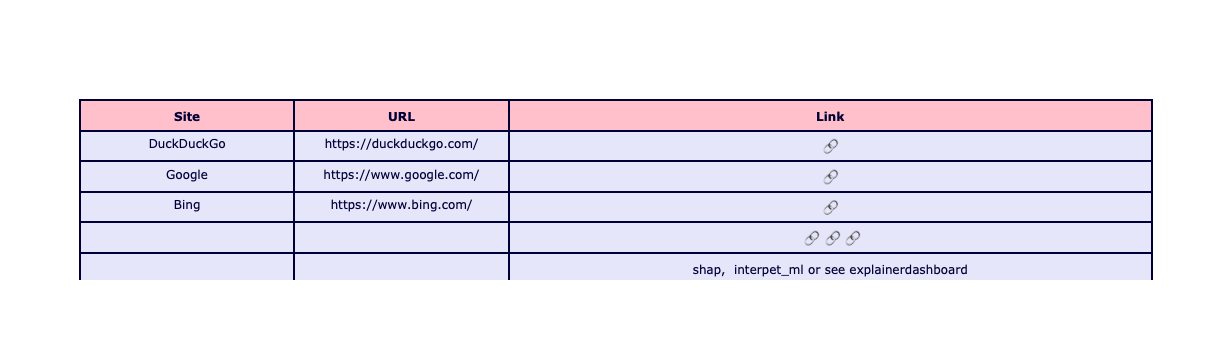

In [33]:
fig = go.Figure(
    data=[
        go.Table(
            columnwidth = [1,1,3],
            header=dict(
                values=[f"<b>{i}</b>" for i in test_df.columns.to_list()],
                fill_color='pink'
                ),
            cells=dict(
                values=test_df.transpose(), fill_color='lavender'),
            )
        ]
    )
fig.show()

In [34]:
#make the general table
general_table = pd.read_csv('./data/md_agnostic.csv')
general_table.drop(['Library or example'], axis=1).to_csv('md_agnostic_table_cleaned.csv', index=False)

In [35]:
general_table

,Goal,Output,Method,Library or example,Library or example hyperlink
0,Microscope AI,Coefficients,SHAP,https://shap.readthedocs.io/en/latest/index.ht...,"<a href=""https://shap.readthedocs.io/en/lates..."
1,Microscope AI,Visual,SHAP,https://shap.readthedocs.io/en/latest/index.ht...,"<a href=""https://shap.readthedocs.io/en/lates..."
2,Microscope AI,Visual,Partial Dependence plots,https://scikit-learn.org/stable/modules/genera...,"<a href=""https://scikit-learn.org/stable/modu..."
3,Microscope AI,Visual,ALE,https://github.com/SeldonIO/alibi/blob/master/...,"<a href=""https://github.com/SeldonIO/alibi/bl..."
4,Model understating,Coefficients,SHAP,https://shap.readthedocs.io/en/latest/index.ht...,"<a href=""https://shap.readthedocs.io/en/lates..."
5,Model understating,Coefficients,Individual predictions analysis,https://explainerdashboard.readthedocs.io/en/l...,"<a href=""https://explainerdashboard.readthedoc..."
6,Model understating,Coefficients,LIME,https://github.com/marcotcr/lime?ysclid=lde9mm...,"<a href=""https://github.com/marcotcr/lime?ysc..."
7,Model understating,Visual,SHAP,https://shap.readthedocs.io/en/latest/index.ht...,"<a href=""https://shap.readthedocs.io/en/lates..."
8,Model understating,Visual,Partial Dependence plots,https://scikit-learn.org/stable/modules/genera...,"<a href=""https://scikit-learn.org/stable/modu..."
9,Model understating,Visual,Contrafactual explanations,https://interpret.ml/DiCE/dice_ml.html#,"<a href=""https://interpret.ml/DiCE/dice_ml.htm..."


In [36]:
general_table2 = pd.read_csv('./data/md_agnostic_table_cleaned.csv')
general_table2.head()

,Goal,Output,Method,Library or example hyperlink
0,Microscope AI,Coefficients,SHAP,"<a href=""https://shap.readthedocs.io/en/lates..."
1,Microscope AI,Visual,SHAP,"<a href=""https://shap.readthedocs.io/en/lates..."
2,Microscope AI,Visual,Partial Dependence plots,"<a href=""https://scikit-learn.org/stable/modu..."
3,Microscope AI,Visual,ALE,"<a href=""https://github.com/SeldonIO/alibi/bl..."
4,Model understating,Coefficients,SHAP,"<a href=""https://shap.readthedocs.io/en/lates..."


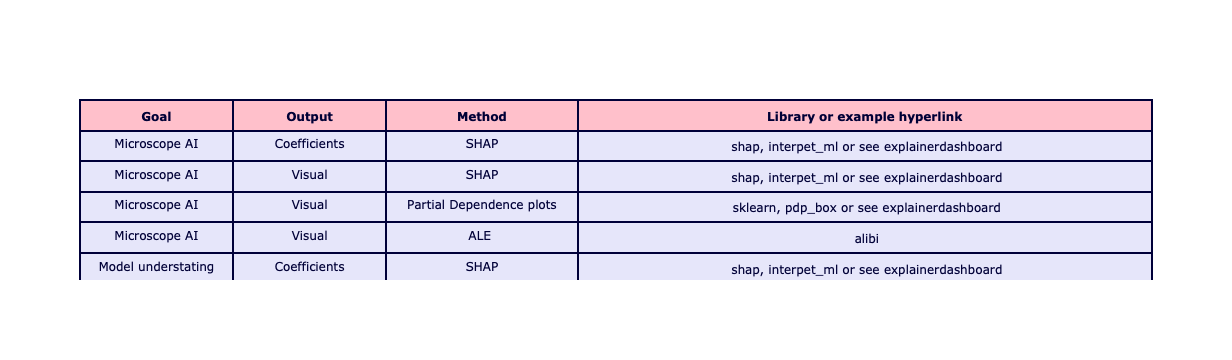

In [37]:
fig = go.Figure(
    data=[
        go.Table(
            columnwidth = [0.8, 0.8, 1, 3],
            header=dict(
                values=[f"<b>{i}</b>" for i in general_table2.columns.to_list()],
                fill_color='pink'
                ),
            cells=dict(
                values=general_table2.transpose(), fill_color='lavender'),
            )
        ]
    )
fig.show()

In [38]:
general_table.loc[(general_table['Goal'] == 'Microscore AI') & (general_table['Output'] == 'Vizual')]

,Goal,Output,Method,Library or example,Library or example hyperlink


In [39]:
general_table.query('Goal =="Microscore AI"')['Goal'] = ['Microscope']

/var/folders/97/cn0tzgm16wq1pvpg99pl3w8h0000gn/T/ipykernel_14639/3874986007.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
df2 = pd.read_csv('./data/md_specific.csv')
df2.fillna('come soon', inplace=True)
df2.to_csv('./data/md_specific_cleaned.csv', index=False)
df2

,Model,Method,Examples or library,Hyperlink
0,"Linear model (logistic, linear regression)",Diagnostic plots,"examples, 2","<a href=""https://www.kirenz.com/post/2021-11-1..."
1,All classification ml models,Regions of confidence,come soon,come soon
2,"Linear model (logistic, linear regression)",Internal parameters analysis,exmaple,"<a href=""https://maheshwarappa-a.gitbook.io/ex..."
3,"Ensemble model (sklearn, CatBoost, XGBoost or ...",Feature importances,come soon,come soon
4,Naive bayes,Explain math idea of the model,link,"<a href=""https://christophm.github.io/interpre..."
5,"Linear model (logistic, linear regression)",Explain math idea of the model,link,"<a href=""https://christophm.github.io/interpre..."
6,KNN,Explain math idea of the model,link,"<a href=""https://christophm.github.io/interpre..."
7,Decision tree,Tree graph analysis,come soon,come soon
8,All classification models,Missclassification Analysis,come soon,come soon


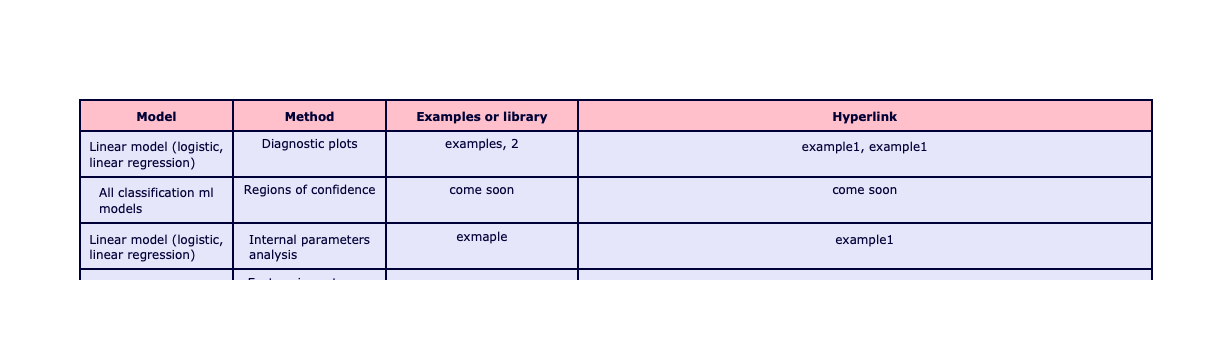

In [41]:
fig = go.Figure(
    data=[
        go.Table(
            columnwidth = [0.8, 0.8, 1, 3],
            header=dict(
                values=[f"<b>{i}</b>" for i in df2.columns.to_list()],
                fill_color='pink'
                ),
            cells=dict(
                values=df2.transpose(), fill_color='lavender'),
            )
        ]
    )
fig.show()